<a href="https://colab.research.google.com/github/AIceDog/Pyotrch-Notes/blob/master/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#导入相应的包
import torch as t
import torch.nn as nn
import torch.nn.functional as F

#定义LeNet模型
class LeNet(nn.Module):    
    def __init__(self):        
        super(LeNet,self).__init__()        
        self.conv1 = nn.Conv2d(1, 6, 2)                   
        self.maxpool1 = nn.MaxPool2d(2, 2)        
        self.conv2 = nn.Conv2d(6, 16, 2)        
        self.maxpool2 = nn.MaxPool2d(2, 2)        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)        
        self.fc2 = nn.Linear(120, 84)        
        self.fc3 = nn.Linear(84, 10)    
        
    def forward(self, x):        
        x = self.conv1(x)                 
        x = self.maxpool1(x)        
        
        x = self.conv2(x)              
        x = self.maxpool2(x)        
        
        x = x.view(-1, 16 * 5 * 5) #将图像进行展平化处理        
        x = F.relu(self.fc1(x))       
        x = F.relu(self.fc2(x))        
        x = self.fc3(x)        
        
        return x

net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(2, 2), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(2, 2), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [2]:
net.parameters()

<generator object Module.parameters at 0x7ff380e03150>

In [3]:
model_params = 0
for parameter in net.parameters():
  print('parameter.numel() : ', parameter.numel())
  model_params += parameter.numel() # 返回一层参数 weight 和 bias 的数量

print('model_params : ', model_params)

parameter.numel() :  24
parameter.numel() :  6
parameter.numel() :  384
parameter.numel() :  16
parameter.numel() :  48000
parameter.numel() :  120
parameter.numel() :  10080
parameter.numel() :  84
parameter.numel() :  840
parameter.numel() :  10
model_params :  59564


In [4]:
(nn.Conv2d(1, 6, 2)).weight.shape  

torch.Size([6, 1, 2, 2])

In [5]:
(nn.Conv2d(1, 6, 2)).bias.shape  

torch.Size([6])

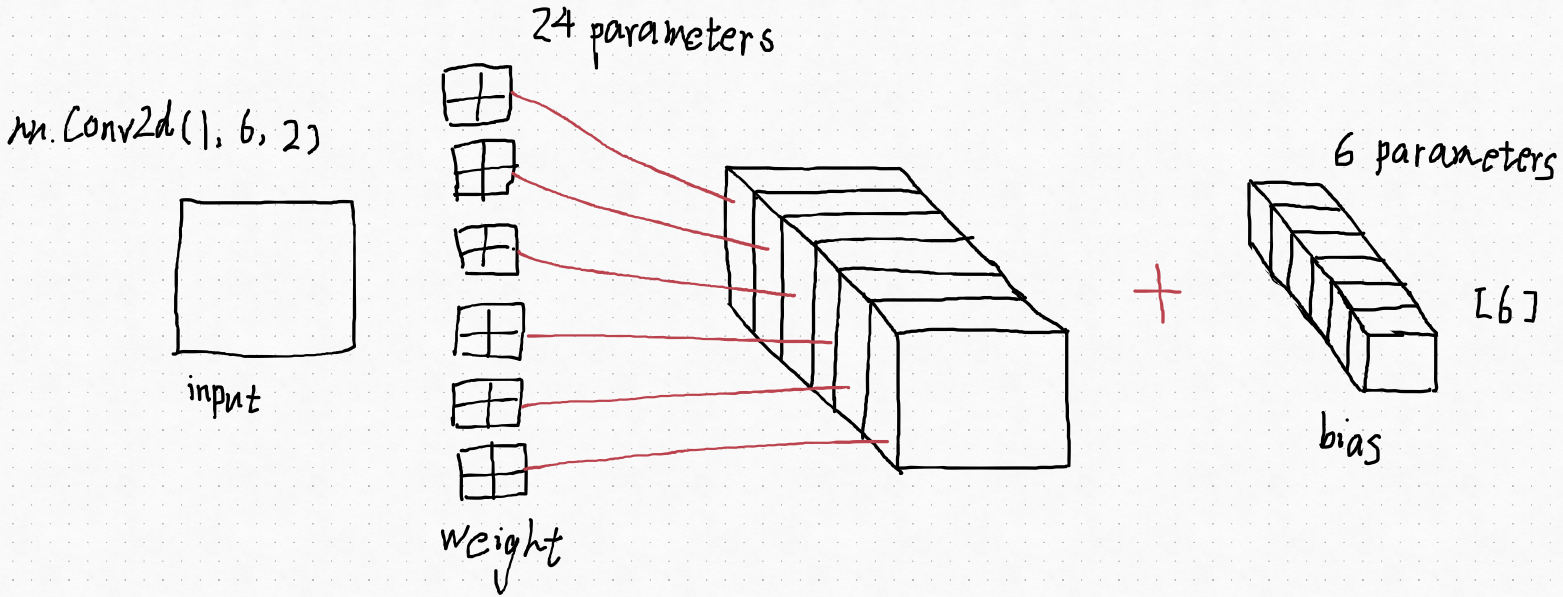

In [6]:
(nn.Conv2d(6, 16, 2)).weight.shape

torch.Size([16, 6, 2, 2])

In [7]:
(nn.Conv2d(6, 16, 2)).bias.shape 

torch.Size([16])

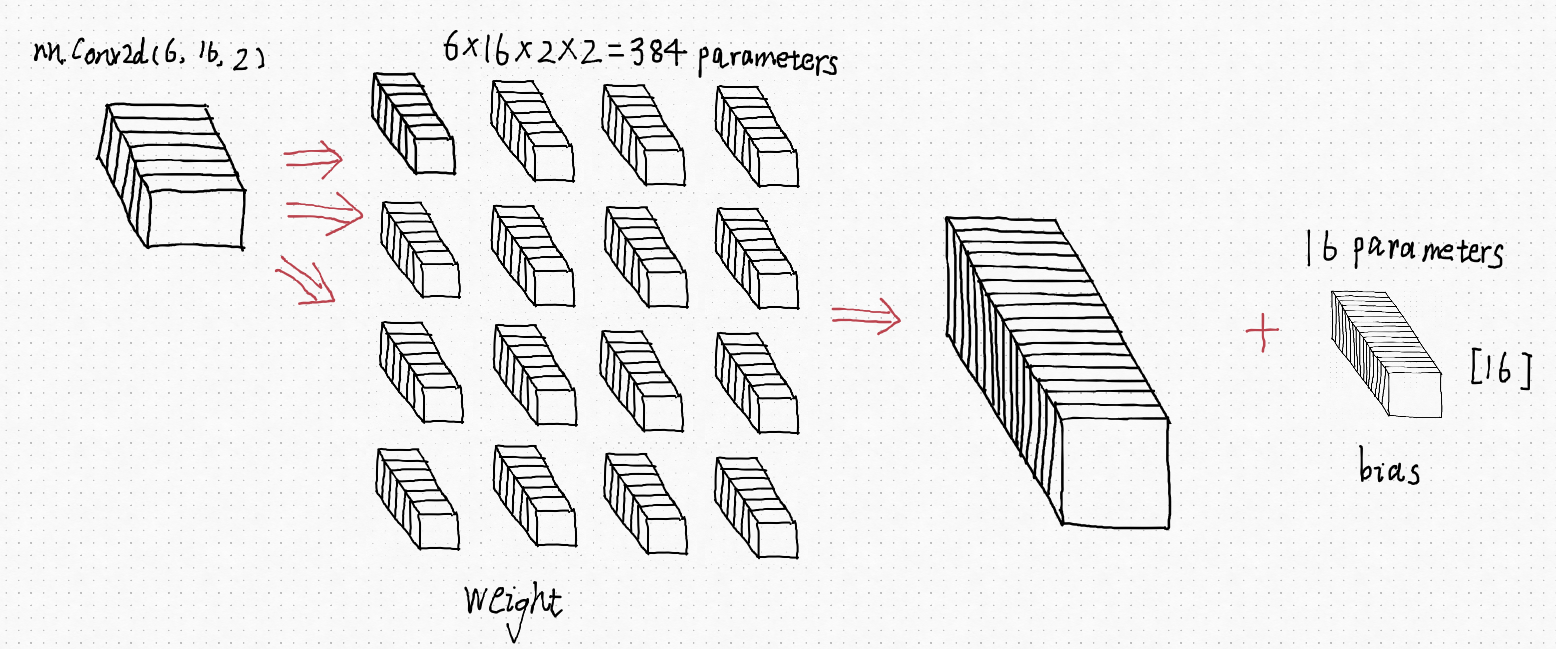